## Day 36 - DIY SOLUTION
**Q1. Problem Statement: Regression Case Study**<br>
Load the insurance.csv dataset into a DataFrame and by following the given tasks, build a good linear regression model.
1. Load the given dataset into a DataFrame
2. Find null values and drop them if it is there
3. Find an Outlier and solve it using the interquartile range (IQR) method
4. Do one-hot encoding for categorical features
5. Split data into X (independent features) and Y(dependent features)
6. Build a simple Linear Regression model and print the residual plot and R2 sore for test data(take test size as 20%)
7. Find variance inflation factor and build a new model and note the R2 score and print summary
8. Do Ridge and Lasso regression and print R2 score for all models.


**Step-1:** Importing Libraries.

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.api import add_constant, OLS

**Step-2:**  Load sample data set Given by sklearn dataset.

In [116]:
df = pd.read_csv("insurance.csv")

In [117]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


**Step-3:** Describe the Dataset.

In [118]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Step-4:** Find null values.

In [119]:
df.isna().sum() # no missing value found

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Step-5:** Check information of DaraFrame.

In [120]:
#check data type and other information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Step-6:** Using seaborn print Box-plot of dependent variable for outlier analysys.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


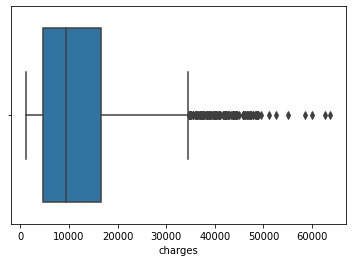

In [121]:
new_df = df.copy() # copy your data to new data frame so what ever changes we will make don't affect to orignal. 
sns.boxplot(new_df['charges']) # dependent vaiable.

**Step-7:** deal with outlier using IQR method.

In [122]:
# outlier treatment using IQR method 
hp = sorted(new_df['charges'])
q1, q3= np.percentile(hp,[25,75])
lower_bound = q1 -(1.5 * (q3-q1)) 
upper_bound = q3 + (1.5 * (q3-q1))
below = new_df['charges'] > lower_bound
above = new_df['charges'] < upper_bound
new_df = new_df[below & above]

In [123]:
new_df.shape

(1199, 7)

In [124]:
new_df.describe() # as we can see that in 'charges' column max and min value is changed as per outlier treatment .

,age,bmi,children,charges
count,1199.000000,1199.000000,1199.000000,1199.000000
mean,38.989992,30.095200,1.084237,9927.753402
std,14.068040,6.010551,1.214304,7241.158309
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,25.800000,0.000000,4408.695900
50%,39.000000,29.735000,1.000000,8410.046850
75%,51.000000,33.820000,2.000000,12953.594600
max,64.000000,53.130000,5.000000,34472.841000


**Step-8:** Using seaborn print dist-plot on dependent variable.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


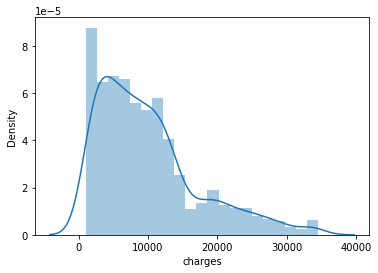

In [125]:
sns.distplot(new_df['charges']) #data distribution of dependent variable

In [126]:
# Lets do a simple check of what range is currently present in the various variables
new_df.describe().transpose() # transpose matrix just print data into  formate where column became row and row became column

,count,mean,std,min,25%,50%,75%,max
age,1199.0,38.989992,14.068040,18.0000,26.0000,39.00000,51.0000,64.000
bmi,1199.0,30.095200,6.010551,15.9600,25.8000,29.73500,33.8200,53.130
children,1199.0,1.084237,1.214304,0.0000,0.0000,1.00000,2.0000,5.000
charges,1199.0,9927.753402,7241.158309,1121.8739,4408.6959,8410.04685,12953.5946,34472.841


**Step-9:** Create dummy variable for One hot encoding.

In [127]:
# dummy variable creation
# Lets create dummy variables out of the categorical variables

fullRaw2 = pd.get_dummies(new_df).copy() 
print(fullRaw2.shape)
fullRaw2.head()

(1199, 12)


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [128]:
fullRaw2.shape

(1199, 12)

**Step-10:** Seprate dependent and independent variable into  x and y, then split into train and test

In [129]:
#Extract independent variables (Xs) and dependent variables (Ys) into separate data objects

x = fullRaw2.drop(["charges"], axis = 1).copy()
y = fullRaw2["charges"].copy()

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state=100) 


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(959, 11)
(240, 11)
(959,)
(240,)


**Model building**

**Step-11:** Importing sklearn Library and call LinearRegression then fit on train data.

In [130]:
from sklearn.linear_model import LinearRegression

In [131]:
model = LinearRegression().fit(x_train,y_train)

In [132]:
pred = model.predict(x_test)

**Step-12:** Evaluate R2 score and Adjusted R2 for model on test data.

In [133]:
score1 = model.score(x_test,y_test) ## Co-effecient of determination (R - Square)
score1

0.6192966378869834

In [134]:
# Adjusted R square
1 - (1-model.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6009293704166185

**Step-13:** Print residual plot.

Text(0, 0.5, 'residuals')

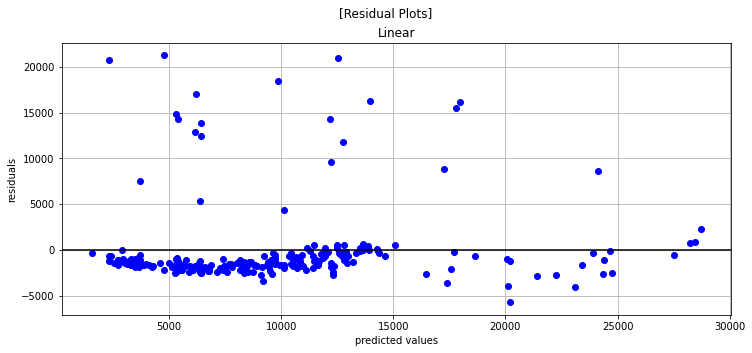

In [135]:
fig, axes = plt.subplots(1, 1, sharex=False, sharey=False)
fig.suptitle('[Residual Plots]')
fig.set_size_inches(12,5)
axes.plot(model.predict(x_test), y_test-model.predict(x_test), 'bo')
axes.axhline(y=0, color='k')
axes.grid()
axes.set_title('Linear')
axes.set_xlabel('predicted values')
axes.set_ylabel('residuals')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Linear')

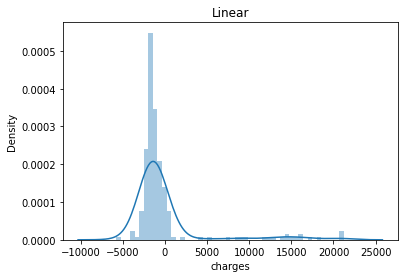

In [136]:
import seaborn as sns

residuals_linear = y_test - model.predict(x_test)
sns.distplot(residuals_linear)
plt.title('Linear')

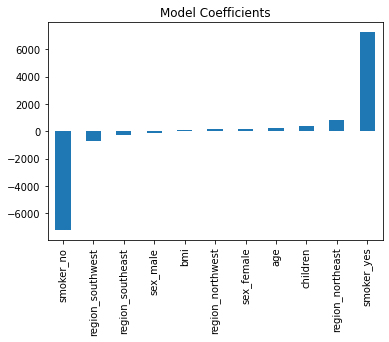

In [137]:
# visulizing model coefficients
predictors = x_train.columns

coef = pd.Series(model.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Model Coefficients')

**Step-14:** Finding variance inflation factor.

In [138]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [139]:
vif= pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [140]:
vif["VIF"]  ### any value of VIF higher than 10 creates a problem in my model.

0     1.020381
1     1.167918
2     1.003027
3          inf
4          inf
5          inf
6          inf
7          inf
8          inf
9          inf
10         inf
Name: VIF, dtype: float64

**Step-15:** Removing columns having high variance inflation factor.

In [141]:
x = add_constant(x)
tempMaxVIF = 5
maxVIF = 5
trainXCopy = x.copy()
counter = 1
highVIFColumnNames = []

while (tempMaxVIF >= maxVIF):
    
    # Create an empty temporary df to store VIF values
    tempVIFDf = pd.DataFrame()
    
    # Calculate VIF using list comprehension
    tempVIFDf['VIF'] = [variance_inflation_factor(trainXCopy.values, i) for i in range(trainXCopy.shape[1])]
    
    # Create a new column "Column_Name" to store the col names against the VIF values from list comprehension
    tempVIFDf['Column_Name'] = trainXCopy.columns
    
    # Drop NA rows from the df - If there is some calculation error resulting in NAs
    tempVIFDf.dropna(inplace=True)
    
    # Sort the df based on VIF values, then pick the top most column name (which has the highest VIF)
    tempColumnName = tempVIFDf.sort_values(["VIF"])[-1:]["Column_Name"].values[0]
    
    # Store the max VIF value in tempMaxVIF
    tempMaxVIF = tempVIFDf.sort_values(["VIF"])[-1:]["VIF"].values[0]
    
    if (tempMaxVIF >= maxVIF): # This condition will ensure that columns having VIF lower than 5 are NOT dropped
        
        print(counter)
        print(tempColumnName)
        
        # Remove the highest VIF valued "Column" from trainXCopy. As the loop continues this step will keep removing highest VIF columns one by one 
        trainXCopy = trainXCopy.drop(tempColumnName, axis = 1)    
        highVIFColumnNames.append(tempColumnName) # here we are making list of deleting variables 
    
    counter = counter + 1


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


1
region_southwest
2
smoker_yes
3
sex_male
4
const
5
bmi
6
age


In [142]:
# now we find out that multi coliniarity kick out all the column except const because we will need it in future
# Remove all those variables which have high VIF

print(highVIFColumnNames)

highVIFColumnNames.remove('const') # We need to exclude 'const' column from getting dropped/ removed. This is the intercept.
print(highVIFColumnNames)
print(len(highVIFColumnNames))

x_new = x.drop(highVIFColumnNames, axis = 1)
print(x.shape)

['region_southwest', 'smoker_yes', 'sex_male', 'const', 'bmi', 'age']
['region_southwest', 'smoker_yes', 'sex_male', 'bmi', 'age']
5
(1199, 12)


In [143]:
x_new # acfter removing some features our new independent features are

,const,children,sex_female,smoker_no,region_northeast,region_northwest,region_southeast
0,1.0,0,1,0,0,0,0
1,1.0,1,0,1,0,0,1
2,1.0,3,0,1,0,0,1
3,1.0,0,0,1,0,1,0
4,1.0,0,0,1,0,1,0
...,...,...,...,...,...,...,...
1333,1.0,3,0,1,0,1,0
1334,1.0,0,1,1,1,0,0
1335,1.0,0,1,1,0,0,1
1336,1.0,0,1,1,0,0,0


**Step-16:** Build OLS model, train with new data and observe R2 and Adjisted R2.

In [144]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_new,y,test_size = 0.20,random_state=10) 
m1ModelDef = OLS(y_train2,x_train2) # (Dep_Var, Indep_Vars) # This is model definition
m1ModelBuild = m1ModelDef.fit() # This is model building. fit() creates the linear regression equation.
m1ModelBuild.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     107.2
Date:                Sat, 23 Apr 2022   Prob (F-statistic):          3.90e-103
Time:                        08:16:36   Log-Likelihood:                -9617.1
No. Observations:                 959   AIC:                         1.925e+04
Df Residuals:                     952   BIC:                         1.928e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.098e+04    674.884     31.085      0.000    1.97e+04    2.23e+04
children           534.3608    147.358      3.626      0.000     245.177     823.545
sex_female         205.3767    356.166      0.577      0.564    -493.584     904.338
smoker_no        -1.394e+04    563.985    -24.720      0.000    -1.5e+04   -1.28e+04
region_northeast  1289.8509    511.599      2.521      0.012     285.859    2293.843
region_northwest   885.8797    506.157      1.750      0.080    -107.433    1879.193
region_southeast    93.0997    506.694      0.184      0.854    -901.267    1087.466
==============================================================================
Omnibus:                      235.116   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              502.871
Skew:                           1.364   Prob(JB):                    6.35e-110
Kurtosis:                       5.267   Cond. No.                         10.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [145]:
score3 =  m1ModelBuild.rsquared
score3

0.40312380401823755

**Step-18:** Do Ridge and Lasso regression for orignal data and observe accuracy.

In [146]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [147]:
# Ridge regression

In [148]:
ridgeReg = Ridge(alpha=0.00001, normalize=True)
x3 = fullRaw2.drop(["charges"], axis = 1).copy()
y3 = fullRaw2["charges"].copy()
x_train3,x_test3,y_train3,y_test3 = train_test_split(x3,y3,test_size = 0.20,random_state=150) 

ridgeReg.fit(x_train3,y_train3)
pred = ridgeReg.predict(x_test3)
score4 = ridgeReg.score(x_test3,y_test3)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [149]:
score4

0.6920605013425538

In [150]:
ridgeReg.coef_

array([  248.53454088,    48.03095781,   402.11265748,   136.42584884,
        -136.42584879, -7074.47033498,  7074.47033484,   575.04504243,
         501.80250575,  -330.16783531,  -762.2783713 ])

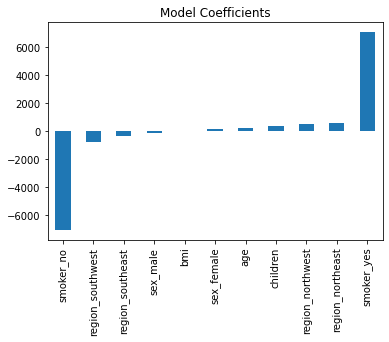

In [151]:
predictors = x_train.columns
coef = pd.Series(ridgeReg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

**Step-19:** Lasso Regression

In [152]:
lassoReg = Lasso(alpha=0.0001)
lassoReg.fit(x_train3,y_train3)
pred = lassoReg.predict(x_test3)
score5 = lassoReg.score(x_test3,y_test3)
score5

0.6920606856065208

In [153]:
lassoReg.coef_

array([ 2.48537106e+02,  4.80320495e+01,  4.02115952e+02,  2.72851125e+02,
       -0.00000000e+00, -1.41490233e+04,  3.66085875e-11,  9.77086191e+02,
        9.03843434e+02,  7.18667251e+01, -3.60246544e+02])

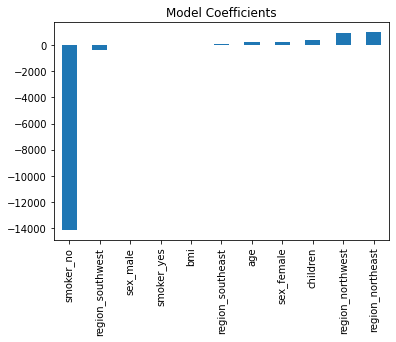

In [154]:
predictors = x_train.columns
coef = pd.Series(lassoReg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

**Step-20:** Final score for all models.

In [155]:
print("all model score is:")
print("simple linear regression:          ",score1)
print("After VIF simple linear regression:",score3)
print("ridge regression:                  ",score4)
print("lasso regression:                  ",score5)

all model score is:
simple linear regression:           0.6192966378869834
After VIF simple linear regression: 0.40312380401823755
ridge regression:                   0.6920605013425538
lasso regression:                   0.6920606856065208


<b> conclusion </b> : we have cleaned the data using different pre-processing techniques and built linear  regression models by validating its assumptions. 